In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/project.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


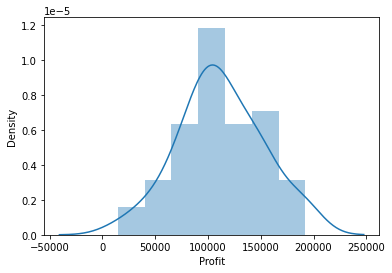

In [7]:
import seaborn as sns
sns.distplot(df['Profit'])
plt.show()

In [8]:
#checking maximum and minimum profit values
df['Profit'].max()

192261.83

In [9]:
df['Profit'].min()

14681.4

In [10]:
df.shape

(50, 5)

In [12]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [14]:
#dropping state column as its categorical and not needed
profit_numeric = df.select_dtypes(include = ['float64','int64'])
profit_numeric.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


**Building** **Model**

In [17]:
x = profit_numeric.iloc[:,0:3].values
x

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52, 148718.95, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [ 91992.39, 135495.07, 252664.93],
       [119943.24, 156547.42, 256512.92],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

In [18]:
y = profit_numeric.iloc[:,-1].values
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [19]:
#importing train_test_split from sklearn to build ML model
# training data is used to fit the model and testing data to create predictive model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [20]:
x_train.shape  # default test size 75% is used for training

(37, 3)

In [21]:
x_test.shape  #default test size 25% is used for testing

(13, 3)

In [22]:
y_train.shape

(37,)

In [23]:
y_test.shape

(13,)

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [25]:
#fitting the model using training data
model.fit(x_train,y_train)

LinearRegression()

In [26]:
# creating variable to predict using fitted model
y_pred = model.predict(x_test)
y_pred

array([104858.68792624, 132180.42376363, 133322.11933423,  72113.62933704,
       179083.55561998, 114843.75907009,  65955.16143209,  98683.96747911,
       114456.08522159, 168405.59509517,  96182.70251536,  87655.37645653,
       110908.05435256])

In [27]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94,  96778.92,  96479.51,
       105733.54])

In [28]:
len(y_pred)

13

In [29]:
len(y_test)

13

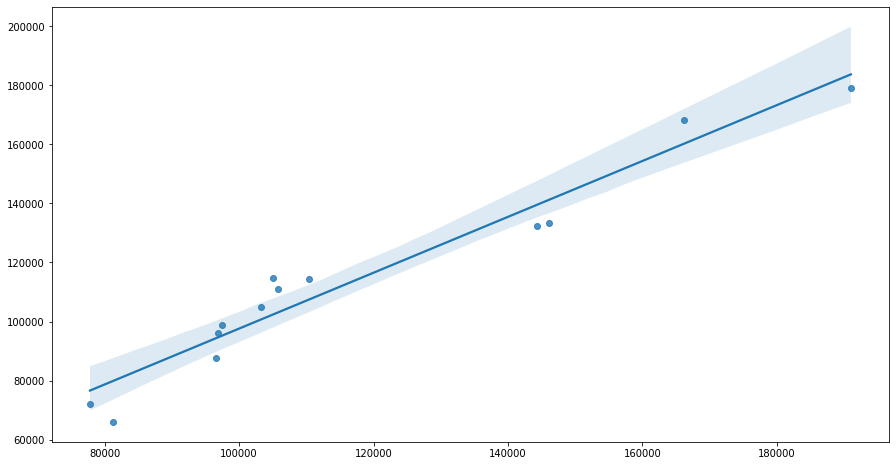

In [32]:
# curve for best fit line
plt.figure(figsize=(15,8))
sns.regplot(x = y_test, y=y_pred)
plt.show()

In [33]:
#using pandas plotting to show difference in original vs predicted data
curve =pd.DataFrame({'Original':y_test,'Predicted':y_pred})
curve

,Original,Predicted
0,103282.38,104858.687926
1,144259.40,132180.423764
2,146121.95,133322.119334
3,77798.83,72113.629337
4,191050.39,179083.555620
5,105008.31,114843.759070
6,81229.06,65955.161432
7,97483.56,98683.967479
8,110352.25,114456.085222
9,166187.94,168405.595095


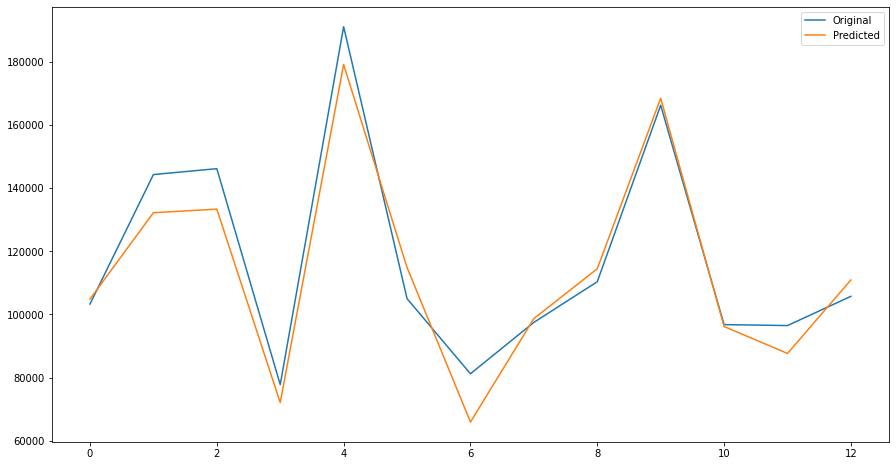

In [34]:
curve.plot(figsize=(15,8))
plt.show()

In [36]:
#calculating accuracy 
from sklearn.metrics import r2_score
acc = r2_score(y_test,y_pred)

In [37]:
#accuracy percentage
acc*100

93.25475204846337